In [8]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ
%matplotlib inline


In [16]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [2]:
circuit = QuantumCircuit(2,1)

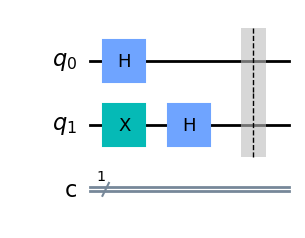

In [3]:
circuit.h(0) #for this algorithm
circuit.x(1)
circuit.h(1)

circuit.barrier()
circuit.draw('mpl')



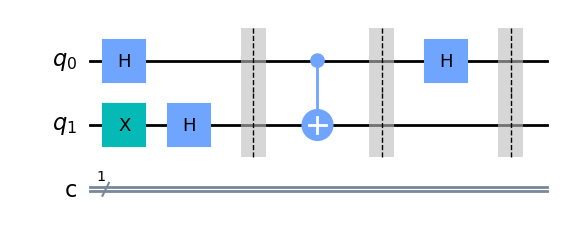

In [4]:
circuit.cx(0,1)  #function
circuit.barrier()
circuit.h(0)
circuit.barrier()
circuit.draw('mpl')

In [5]:
circuit.measure(0,0)

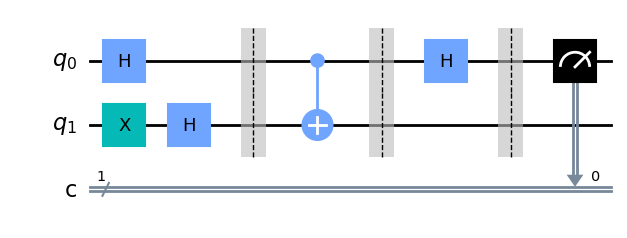

In [6]:
circuit.draw('mpl')

In [ ]:
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend).result()
counts = result.get_counts(circuit)

plot_histogram(counts)

# On real Quantum computer

In [17]:
provider = IBMQ.get_provider("ibm-q")

In [25]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [20]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and 
                                        not x.configuration().simulator and x.status().operational==True))
backend

<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>

In [24]:
backend = provider.get_backend('ibmq_lima')

In [26]:
from qiskit.tools.monitor import job_monitor

In [28]:
q_result = execute(circuit,backend).result()


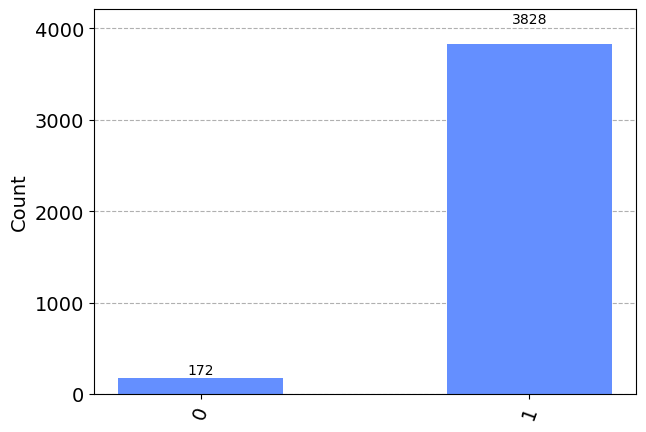

In [31]:
q_counts = q_result.get_counts()
plot_histogram(q_counts)


In [32]:
print(q_counts)

{'0': 172, '1': 3828}
